In [7]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [27]:
# Charger les données
columns = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
"num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
"length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
"engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
"horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

df = pd.read_csv("imports-85.data", names=columns)

In [28]:
# Remplacer '?' par NaN
df.replace('?', np.nan, inplace=True)

# Conversion des colonnes numériques
cols_to_convert = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col])

# Remplissage des valeurs manquantes
for col in ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"]:
    df[col].fillna(df[col].median(), inplace=True)
df["num_doors"].fillna(df["num_doors"].mode()[0], inplace=True)

# Suppression des lignes où 'price' est manquant
df.dropna(subset=['price'], inplace=True)

C:\Users\istec\AppData\Local\Temp\ipykernel_28328\2257025608.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\istec\AppData\Local\Temp\ipykernel_28328\2257025608.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

ANALYSE EXPLORATOIRE ET VISUALISATION

Statistiques descriptives :
        symboling  normalized_losses  wheel_base      length       width  \
count  201.000000         201.000000  201.000000  201.000000  201.000000   
mean     0.840796         120.711443   98.797015  174.200995   65.889055   
std      1.254802          32.111623    6.066366   12.322175    2.101471   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.800000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.500000   66.600000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb_weight  engine_size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean    53.766667  2555.666667   126.875622    3.330299    3.257562   
std      2.447822   517.296727    41.546834    0.268088    0.316082   
min

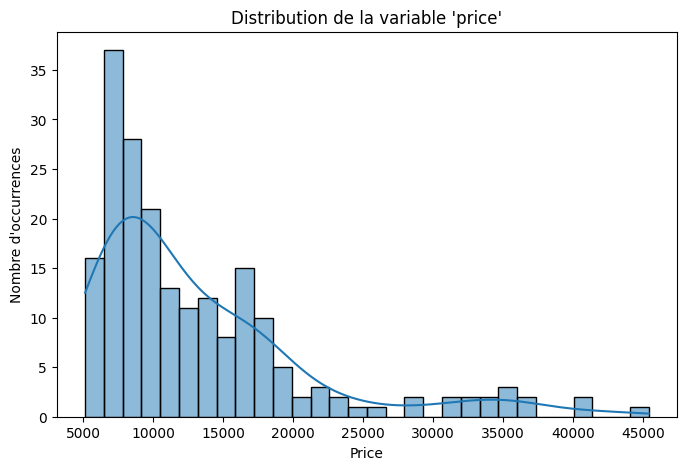

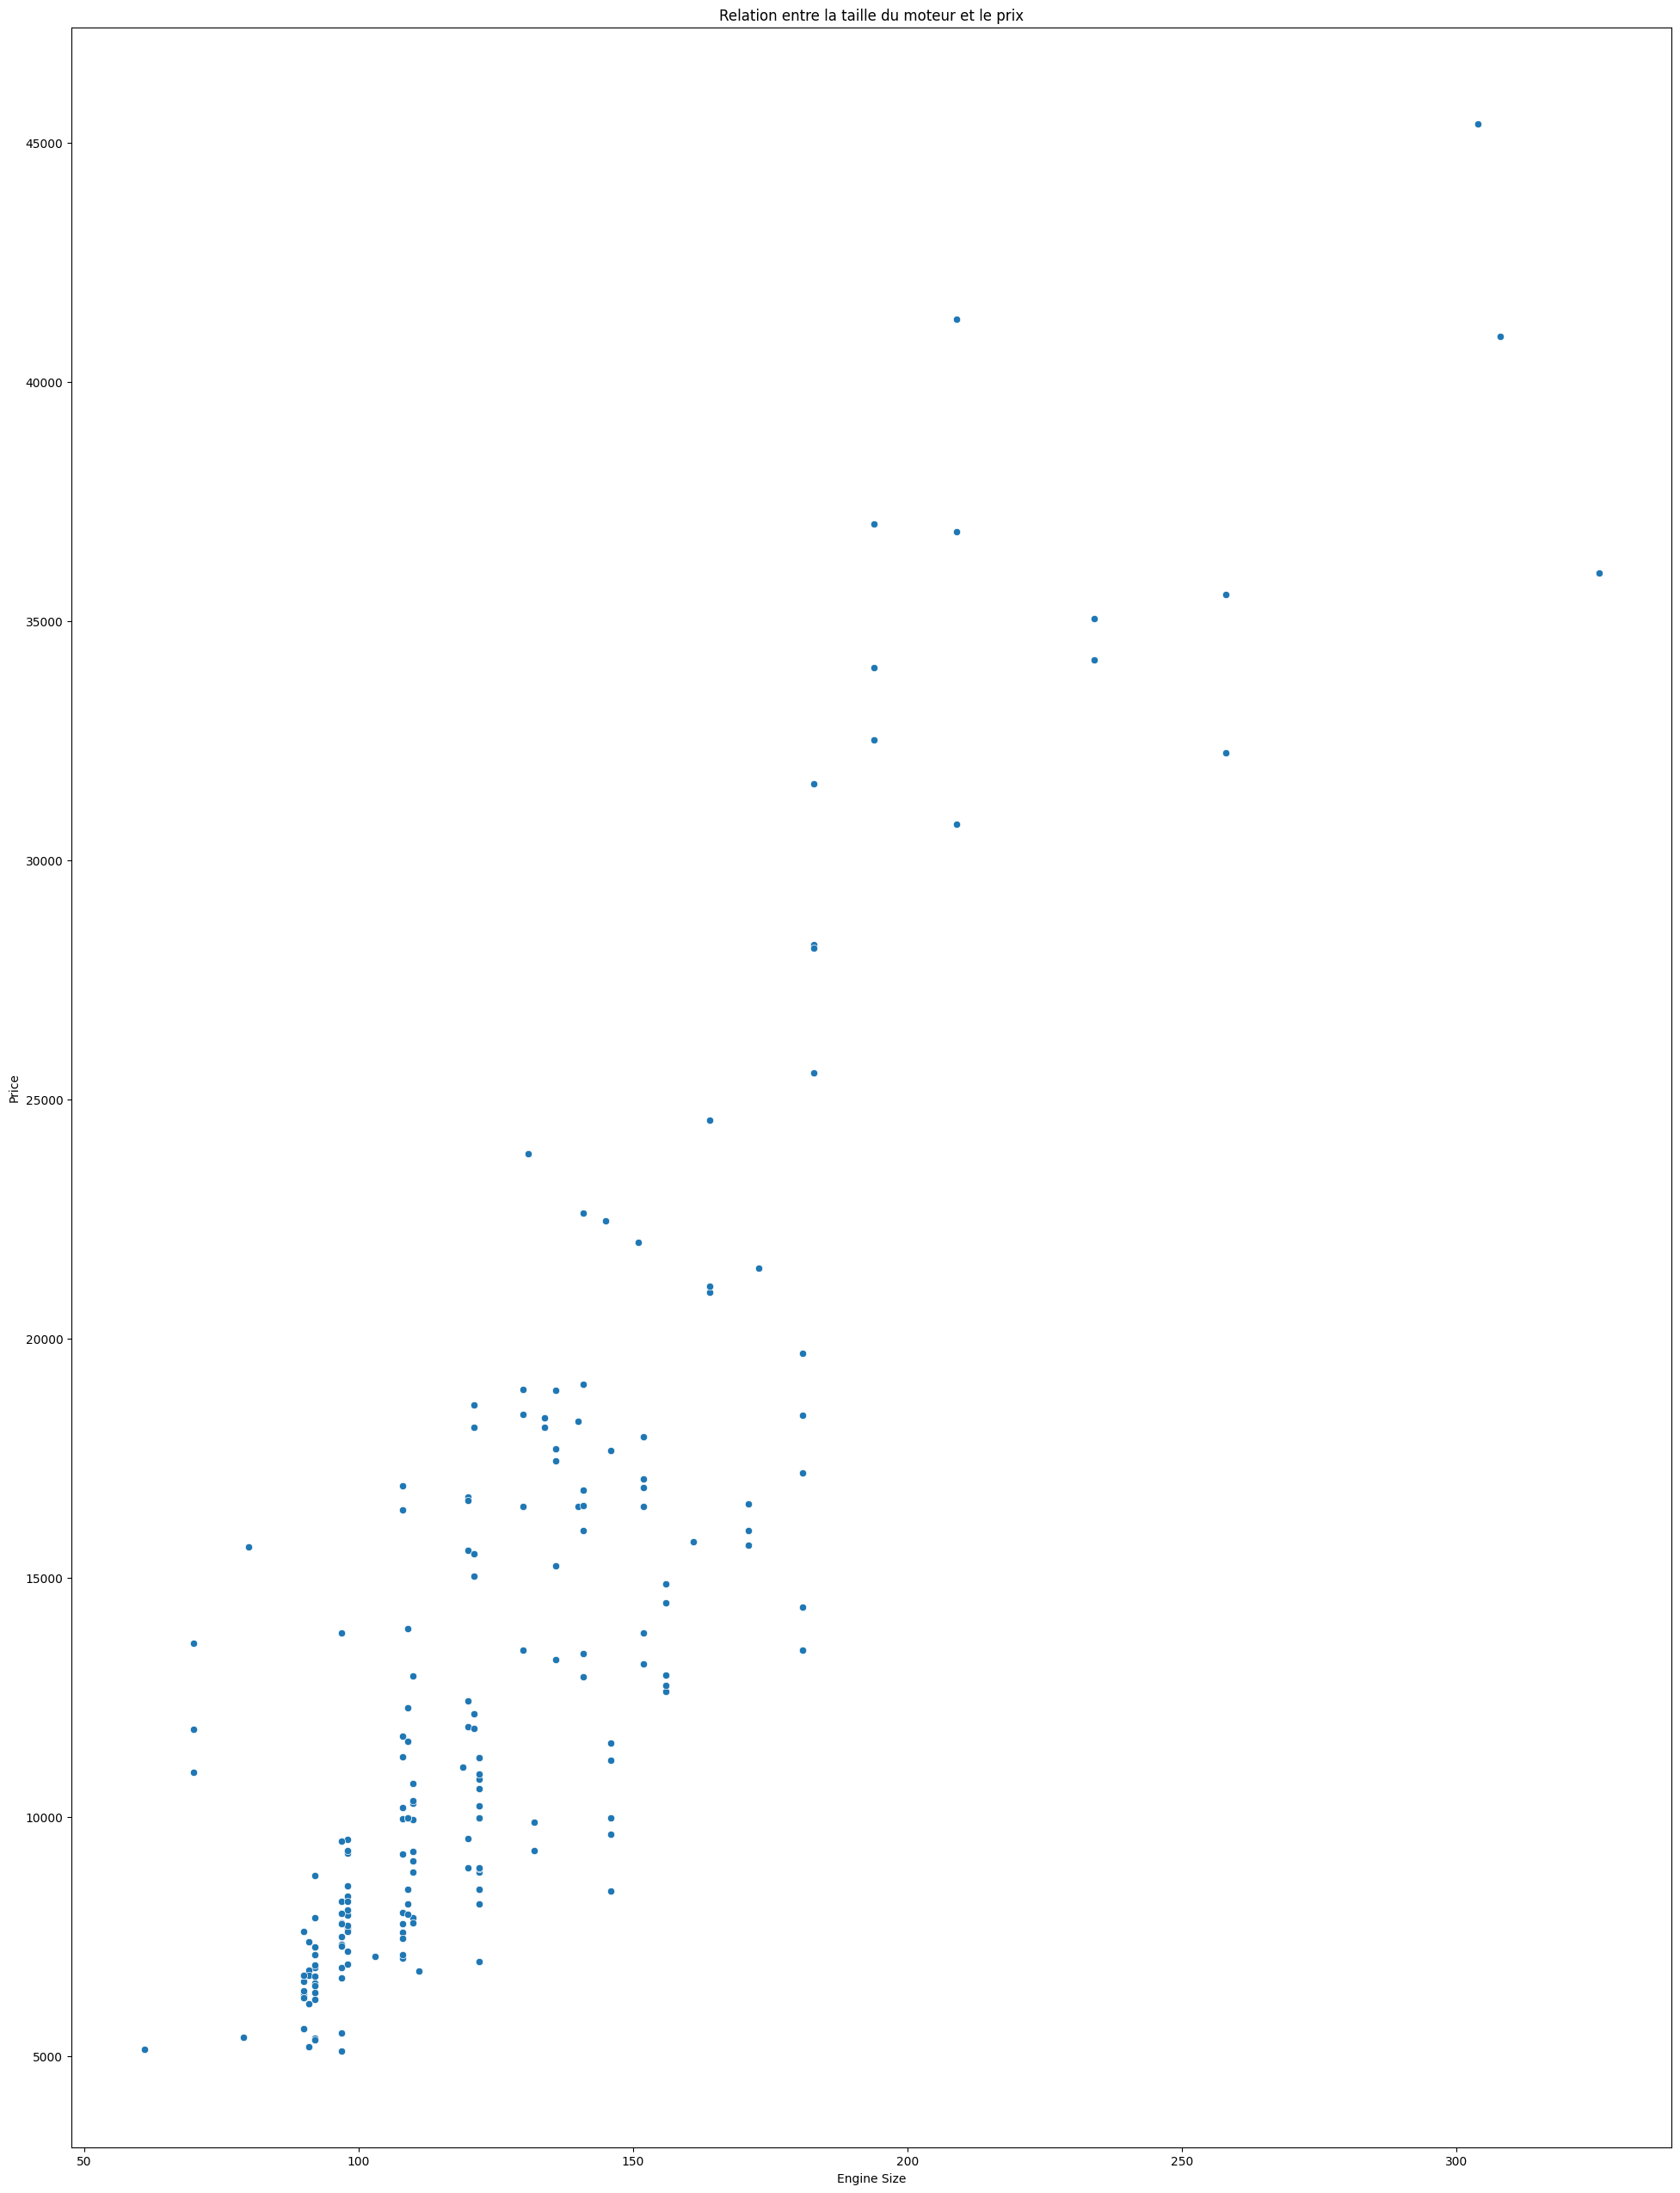

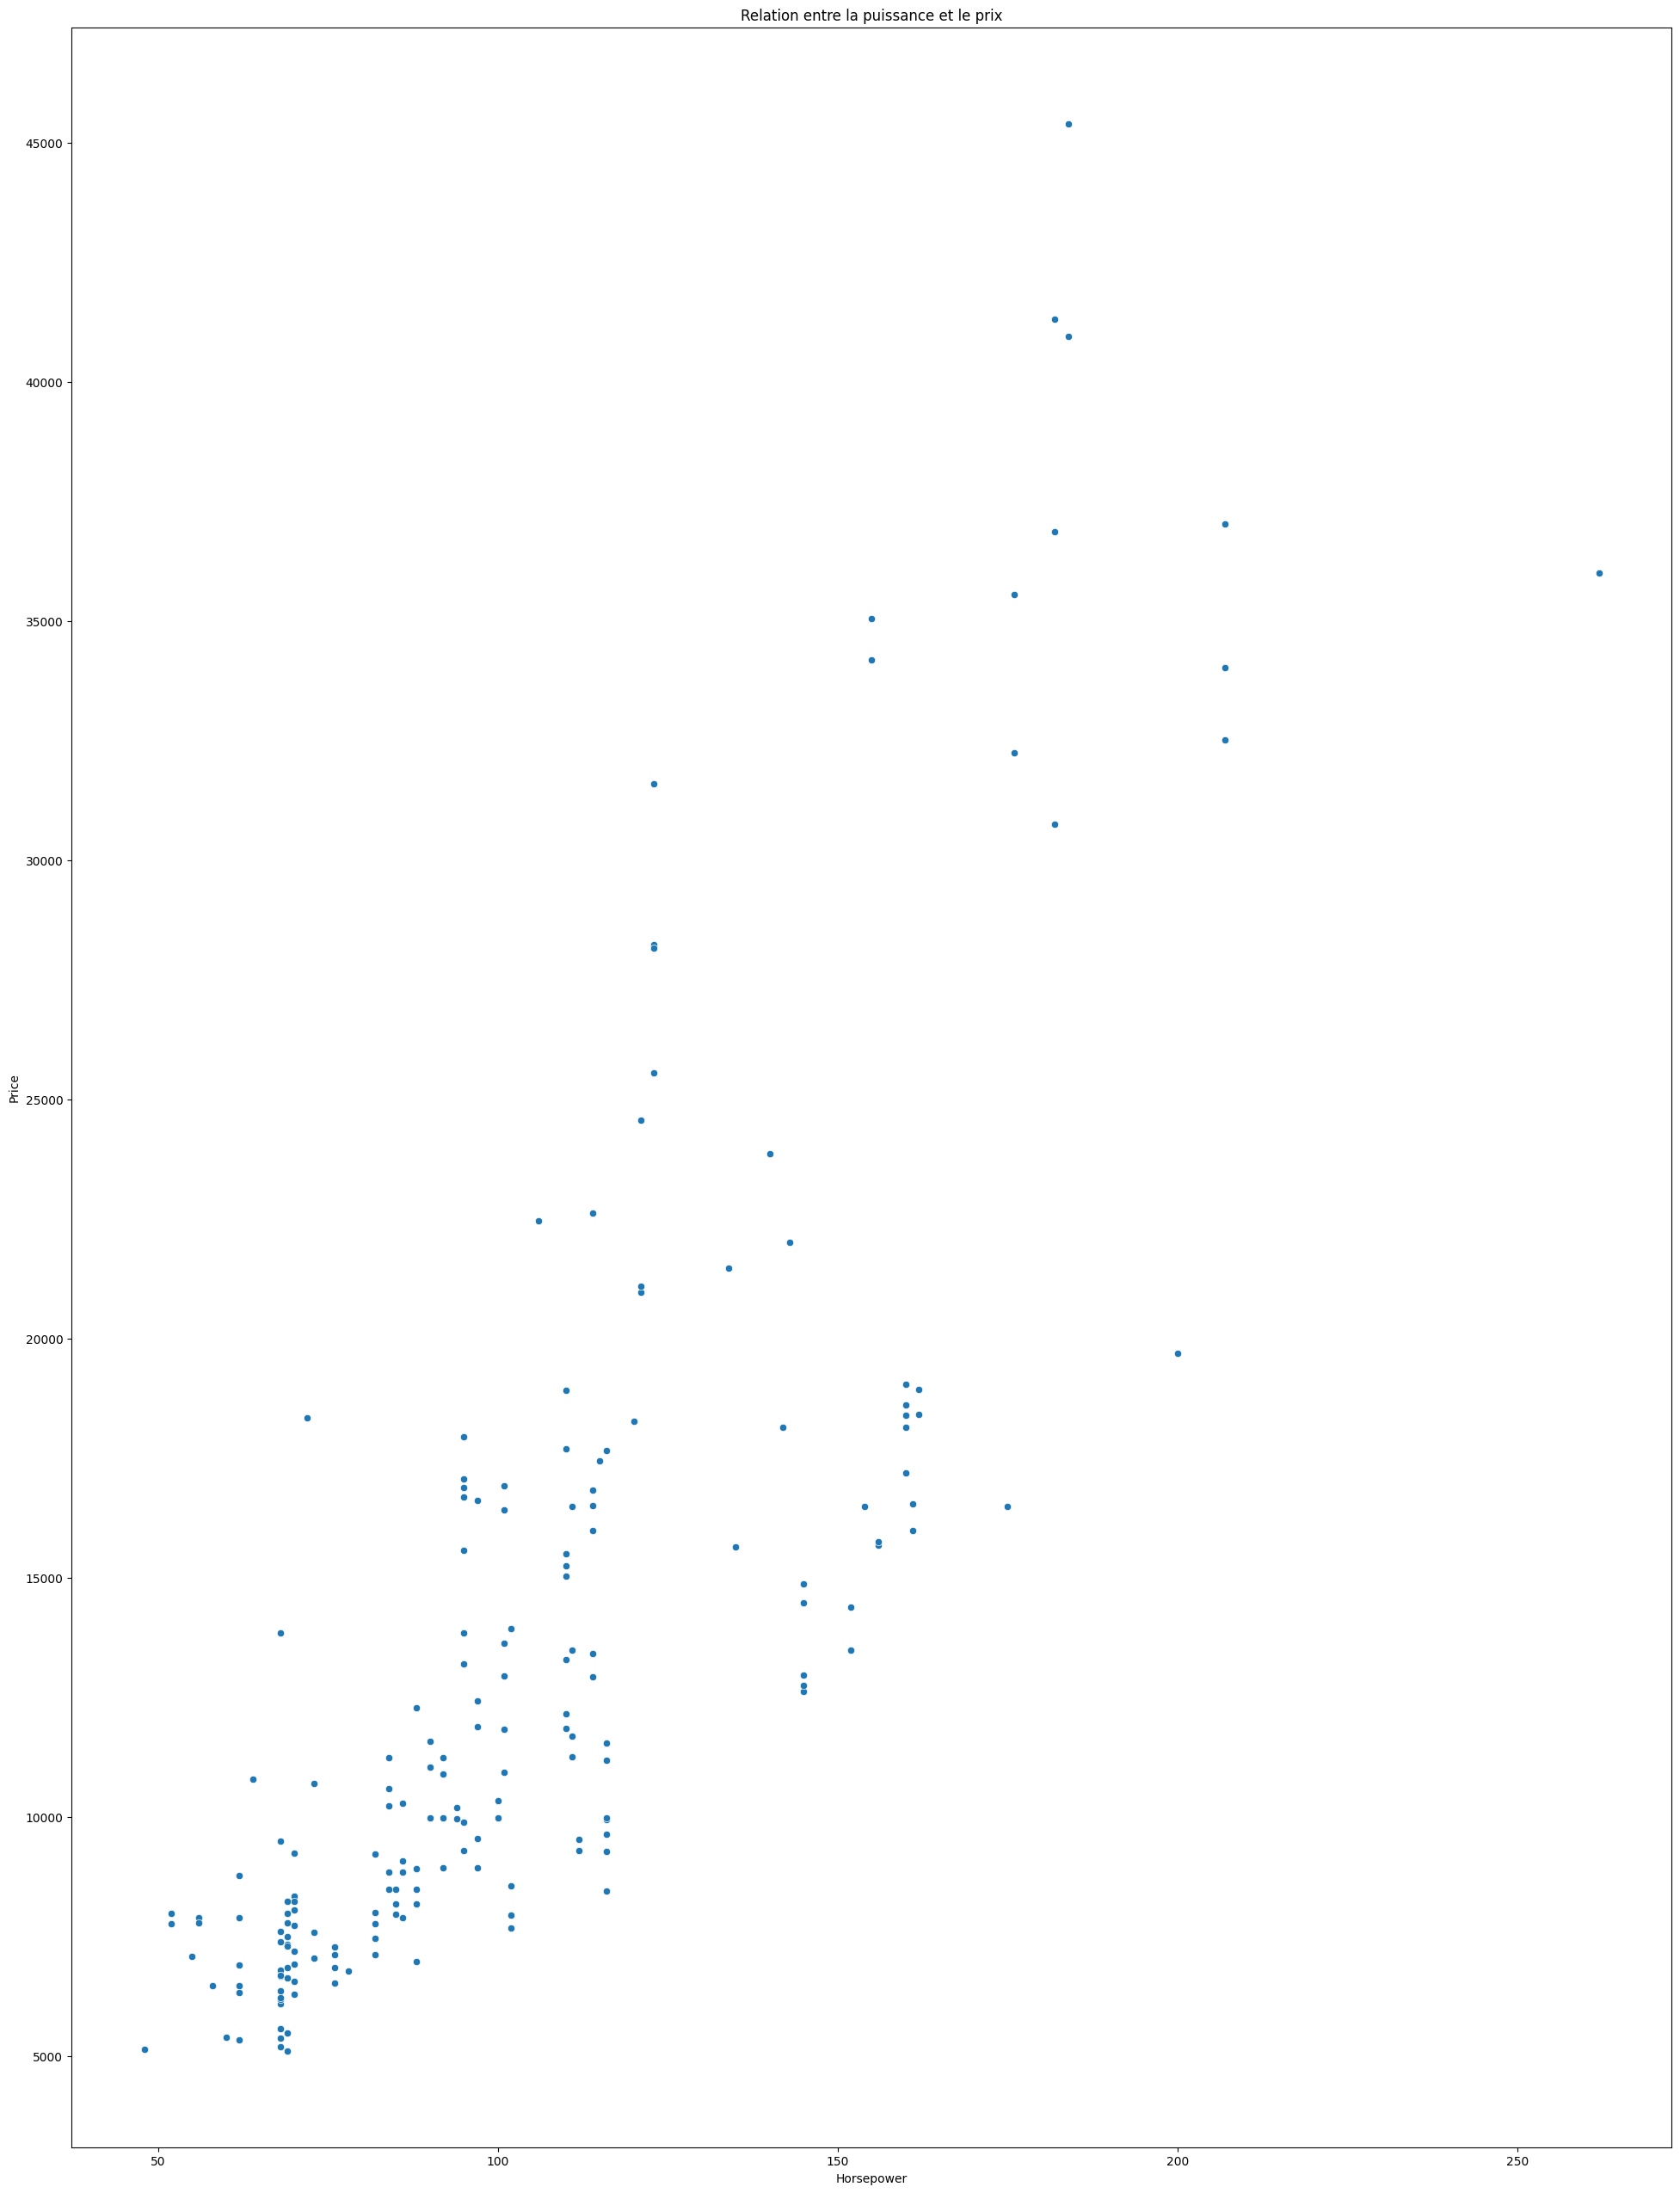

Colonnes non numériques restantes : ['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system']


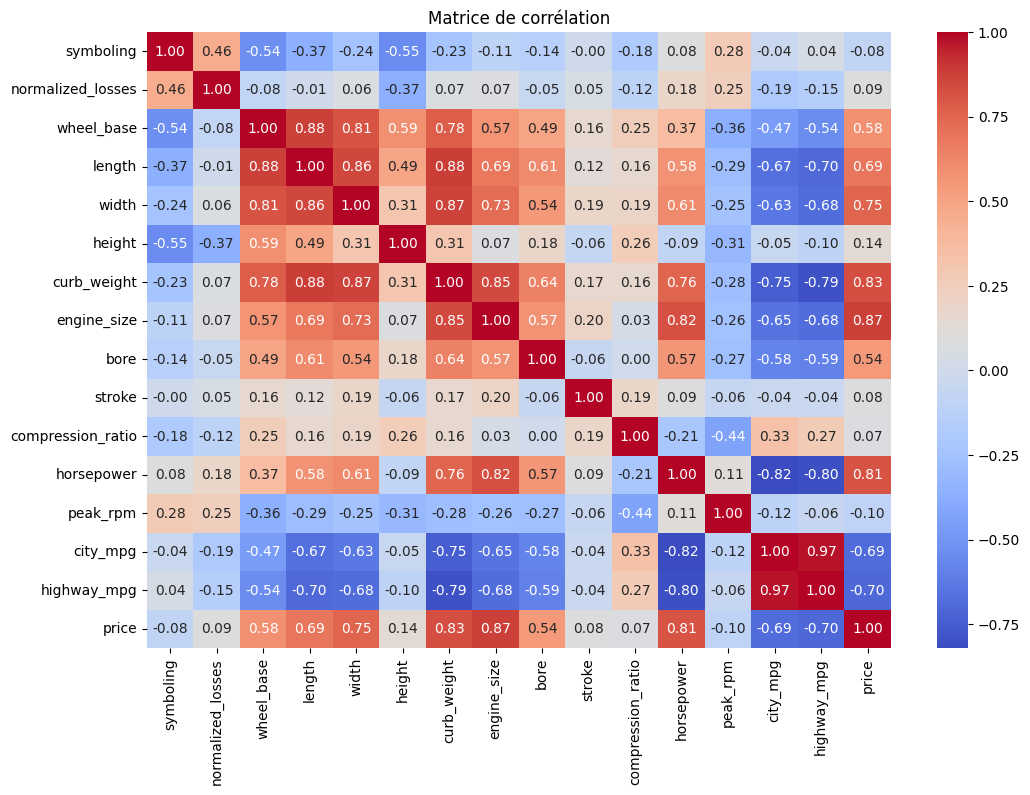

In [29]:
# Afficher les statistiques descriptives
print("Statistiques descriptives :")
print(df.describe())

# Distribution de la variable cible (prix)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution de la variable 'price'")
plt.xlabel("Price")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Visualisation des relations entre quelques variables explicatives et la cible
plt.figure(figsize=(24, 32))
sns.scatterplot(x=df["engine_size"], y=df["price"])
plt.title("Relation entre la taille du moteur et le prix")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(24, 32))
sns.scatterplot(x=df["horsepower"], y=df["price"])
plt.title("Relation entre la puissance et le prix")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

# Vérifier si des valeurs non numériques restent dans le DataFrame
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Colonnes non numériques restantes :", non_numeric_cols.tolist())

# Supprimer les colonnes non numériques pour la corrélation
df_numeric = df.select_dtypes(include=[np.number])

# Matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


PRÉPARATION DES DONNÉES POUR LA MODÉLISATION

In [30]:
# Encodage des variables catégorielles
categorical_cols = ["make", "fuel_type", "aspiration", "num_doors", "body_style", 
                    "drive_wheels", "engine_location", "engine_type", "num_cylinders", "fuel_system"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Séparation des données
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']


In [31]:
# Séparation en train/test pour régression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles de régression
reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

best_reg_model = None
best_reg_score = float("inf")

In [33]:
# Entraînement des modèles de régression
for name, model in reg_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2 Score: {r2_score(y_test, y_pred)}")
    
    if mse < best_reg_score:
        best_reg_score = mse
        best_reg_model = model

Linear Regression - MSE: 10883796.738426715, R2 Score: 0.9110414074340086
Ridge - MSE: 9567947.575774463, R2 Score: 0.9217964860478347
Lasso - MSE: 8595562.214627855, R2 Score: 0.9297442670693203
Decision Tree - MSE: 7515451.853658536, R2 Score: 0.9385725371883804


C:\Users\istec\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+08, tolerance: 7.300e+05
  model = cd_fast.enet_coordinate_descent(


Random Forest - MSE: 9249958.519165616, R2 Score: 0.9243955660938113
SVR - MSE: 149429834.9340248, R2 Score: -0.22136310724788522


In [34]:
print(best_reg_model)

DecisionTreeRegressor()


Pourquoi choisir Decision Tree Regressor ?
Dans le code, le critère de sélection du meilleur modèle est basé sur la minimisation du MSE.

Decision Tree a obtenu le plus faible MSE (7,515,451), ce qui signifie qu'il fait moins d'erreurs que les autres modèles sur les données de test.
Son R² est le plus élevé (0.939), ce qui indique qu'il explique 94 % de la variance des prix.
Avantages de Decision Tree Regressor
- Haute performance sur l'ensemble de test.
- Capable de capturer des relations complexes entre les variables sans supposer de forme linéaire.
- Interprétable, car il permet d'identifier les critères les plus influents sur le prix.

In [ ]:
# Sauvegarde du modèle de régression
joblib.dump(best_reg_model, "regression_model.pkl")

In [35]:
# Transformation de y pour la classification (discrétisation en 2 classes)
y_class = pd.qcut(y, q=2, labels=[0, 1])

# Séparation pour classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Modèles de classification
clf_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_clf_model = None
best_clf_score = 0

In [36]:
# Entraînement des modèles de classification
for name, model in clf_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred)
    print(f"{name} - Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test_class, y_pred))
    
    if accuracy > best_clf_score:
        best_clf_score = accuracy
        best_clf_model = model

Logistic Regression - Accuracy: 0.9024390243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.86      0.95      0.90        19

    accuracy                           0.90        41
   macro avg       0.90      0.91      0.90        41
weighted avg       0.91      0.90      0.90        41

Decision Tree - Accuracy: 0.9024390243902439
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.86      0.95      0.90        19

    accuracy                           0.90        41
   macro avg       0.90      0.91      0.90        41
weighted avg       0.91      0.90      0.90        41

Random Forest - Accuracy: 0.926829268292683
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.86  

C:\Users\istec\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print(best_clf_model)

RandomForestClassifier()


Pourquoi choisir RandomForestClassifier ?
Le critère de sélection du modèle est basé sur l'accuracy (taux de bonne classification).

Random Forest obtient l'accuracy la plus élevée (92.7%), contre 90.2% pour Logistic Regression et Decision Tree.
Son F1-score pondéré est également le plus élevé (0.93), indiquant un bon équilibre entre précision et rappel.
Avantages de RandomForestClassifier
- Performance supérieure : il réduit l'overfitting d'un arbre unique.
- Robustesse : il est moins sensible aux variations des données.
- Capacité à gérer des données complexes grâce à la combinaison de plusieurs arbres de décision.

In [ ]:
# Sauvegarde du modèle de classification
joblib.dump(best_clf_model, "classification_model.pkl")